In [2]:
import matplotlib.pyplot as plt
import numpy as np

# from tools import load_radar, load_spec, process, boxcar, standard_div, dark_sub, normalise
# from db_tools import initiate_db, close_db, read_from_db, write_entry
# from train_pills import train_model, validate_model

from tools import *
from db_tools import *
from modelling import *

### Contents

- define radar_plotter
- empty cuvette data
- different fill heights
- caffeine (RADAR) loose and fixed
- define spectra_plotter
- caffeine (SPEC) loose and fixed

## General

In [5]:
# path to main folder
path = '/home/amiremami/BScProject'

In [6]:
# test loading
rad = load_radar(path+'data/radar/caffeine1.csv')
sp =load_spec(path+'data/spec/caffeine1.txt')

In [7]:
# plotting radar signals from a list of frames
def radar_plotter(frames,title,textpos=0.4):
    
#     plot_pos = []
#     for i in [0,1]:
#         for j in [0,1]:
#             plot_pos.append((i,j))

#     fig, axs = plt.subplots(2,2, figsize=(7,7), sharex=True, sharey=True)
#     fig.subplots_adjust(hspace=0.1, wspace=0.1)

    plot_pos = range(0,4)
    fig, axs = plt.subplots(1,4, figsize=(12,3), sharex=True, sharey=True)
    fig.subplots_adjust(hspace=0, wspace=0)
    
    
    fig.suptitle(title,weight='bold')

    for ch in [1,2,3,4]: # channel 1,2,3, or 4

        ax = axs[plot_pos[ch-1]]
        for frame in frames:
            signal = frame[(ch-1)*64:ch*64]
            ax.plot(range(1,64+1),signal)
        ax.text(55,textpos,"Rx"+str(ch),weight='bold') # make position relative using 'transform'??

    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel("Chirp response bin")
    plt.ylabel("Amplitude (arb.)")
    
    return axs

## Empty cuvette data

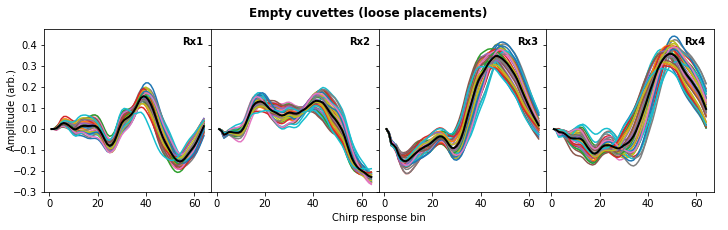

In [8]:
filenames = ['empty'+str(i)+'.csv' for i in range(124,163+1)]
empties = []

for name in filenames:        
    empties.append(load_radar(path+'data/radar/pre/loose/'+name))
    
axs = radar_plotter(empties,'Empty cuvettes (loose placements)')

plot_pos = range(4)
# AVERAGE
empty_avg = np.sum(empties,axis=0)/len(empties)
for ch in [1,2,3,4]: # channel 1,2,3, or 4
    ax = axs[plot_pos[ch-1]]
    signal = empty_avg[(ch-1)*64:ch*64]
    ax.plot(range(1,64+1),signal,linewidth=2,c='black')
    
plt.show()

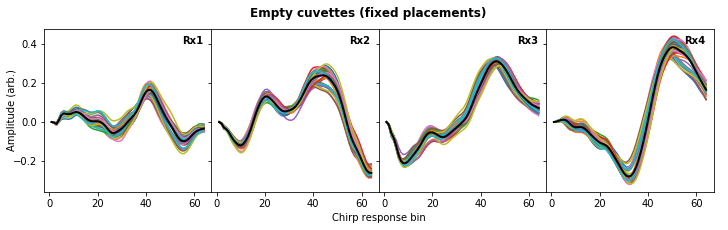

In [7]:
filenames = ['empty'+str(i)+'.csv' for i in range(1,40+1)]
empties = []

for name in filenames:        
    empties.append(load_radar(path+'data/radar/pre/'+name))
    
axs = radar_plotter(empties,'Empty cuvettes (fixed placements)')

plot_pos = range(4)
# AVERAGE
empty_avg = np.sum(empties,axis=0)/len(empties)
for ch in [1,2,3,4]: # channel 1,2,3, or 4
    ax = axs[plot_pos[ch-1]]
    signal = empty_avg[(ch-1)*64:ch*64]
    ax.plot(range(1,64+1),signal,linewidth=2,c='black')
    
plt.show()

## Glass vs plastic (loose)

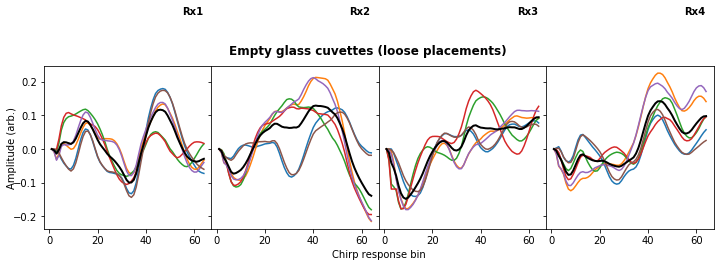

In [14]:
filenames = ['glass_empty'+str(i)+'.csv' for i in [175,176,179,180,181,182]]
g_empties = []

for name in filenames:        
    g_empties.append(load_radar(path+'data/radar/pre/loose/'+name))
    
axs = radar_plotter(g_empties,'Empty glass cuvettes (loose placements)')

plot_pos = range(4)
# AVERAGE
g_empty_avg = np.sum(g_empties,axis=0)/len(g_empties)
for ch in [1,2,3,4]: # channel 1,2,3, or 4
    ax = axs[plot_pos[ch-1]]
    signal = g_empty_avg[(ch-1)*64:ch*64]
    ax.plot(range(1,64+1),signal,linewidth=2,c='black')
    
plt.show()

## Different height fills

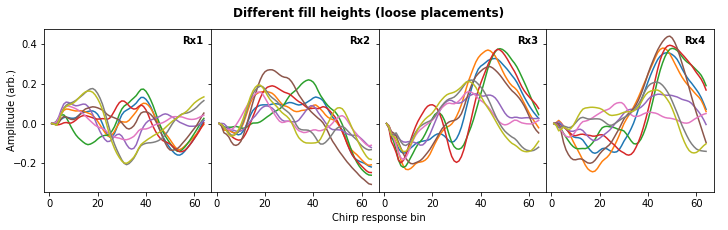

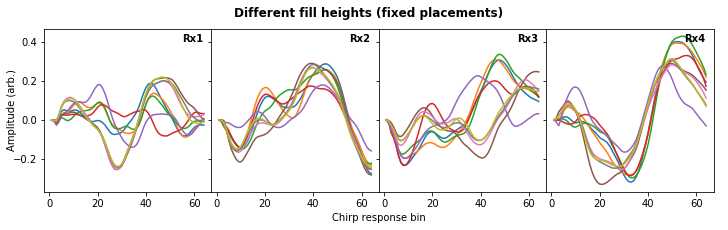

In [15]:
## LOOSE
filenames = ['fill_height_'+i+'mm.csv' for i in ['00','05','10','15','20','25','30','35','40']]
heights = []

for name in filenames:        
    heights.append(load_radar(path+'data/radar/pre/loose/'+name))
    
radar_plotter(heights,'Different fill heights (loose placements)')
plt.show()

## FIXED
filenames = ['fill_height_'+i+'.csv' for i in ['0','5','10','15','20','25','30','35','40']]
heights = []

for name in filenames:        
    heights.append(load_radar(path+'data/radar/pre/'+name))
    
radar_plotter(heights,'Different fill heights (fixed placements)')
plt.show()

## Plots of caffeine (loose and fixed)

Import data from database

In [16]:
# old
runs = 40
data_old = []
db_path = path+'data/data_loose.db'

data_old.append([])
for n in range(1,runs+1):

    row = read_from_db(db_path,label='caffeine', run=n)
    data_old[0].append(row)

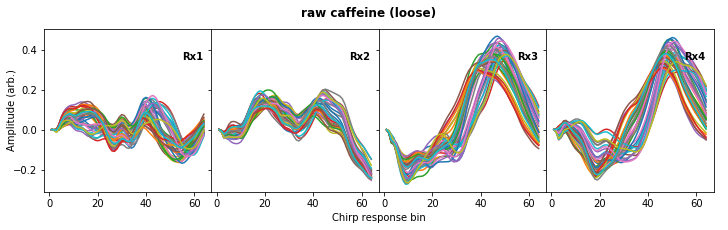

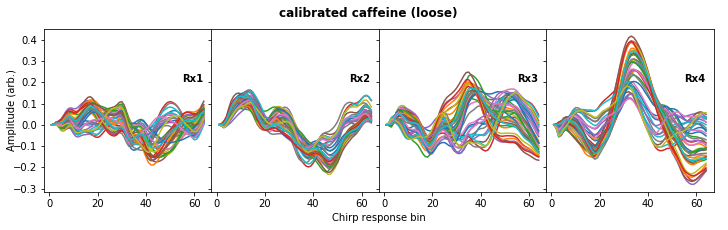

In [17]:
caffeine_radar_loose = [data_old[0][i][3] for i in range(40)]

radar_plotter(caffeine_radar_loose,'raw caffeine (loose)',0.35)
plt.show()
radar_plotter(caffeine_radar_loose-empty_avg,'calibrated caffeine (loose)',0.2)
plt.show()

In [18]:
# new
runs = 40
data = []
db_path = path+'data/data.db'
   
data.append([])
for n in range(1,runs+1):

    row = read_from_db(db_path,label='caffeine', run=n)
    data[0].append(row)

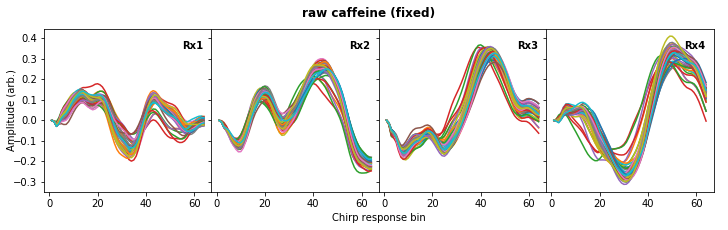

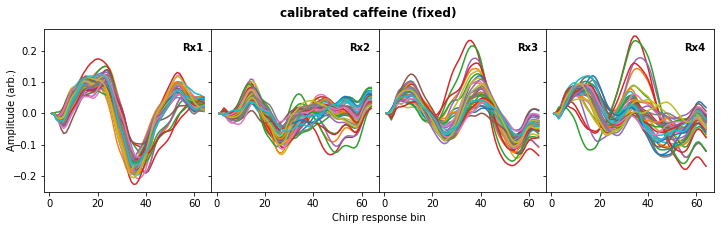

In [24]:
caffeine_radar_fixed = [data[0][i][3] for i in range(40)]

radar_plotter(caffeine_radar_fixed,'raw caffeine (fixed)',0.35)
plt.show()
radar_plotter(caffeine_radar_fixed-empty_avg,'calibrated caffeine (fixed)',0.2)
plt.show()

## Spectroscopy

In [25]:
def spectra_plotter(frames,title):
    
    fig, axs = plt.subplots(2,1, figsize=(6,6), sharex=True)
    fig.subplots_adjust(hspace=0.05, wspace=0)
    fig.suptitle(title,weight='bold')
    
    ax = axs[0]
    for frame in caffeine_spec:
        ax.plot(w,dark_sub(frame,d))
    ax.plot(w,s,c='black')

    ax = axs[1]
    # plot "calibrated" and smoothed
    for frame in caffeine_spec:
        processed_frame = boxcar(normalise(s)-normalise(dark_sub(frame,d))*0.97,10)
        ax.plot(w,processed_frame)
        
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Amplitude (arb.)")

#### import dark, standard, empty cuvette spectra

In [26]:
# import dark and process standard
w = np.loadtxt(path+'data/spec/calib/wavelengths.txt')

d = load_spec(path+'/data/spec/calib/dark.txt')
s = load_spec(path+'/data/spec/calib/standard_and_plastic_5ms.txt')
s = dark_sub(s,d)

# empty cuvette
# emp = load_spec(path+'data/spec/calib/empty_plastic.txt')
# emp = dark_sub(emp,d)

### Spectra (loose)

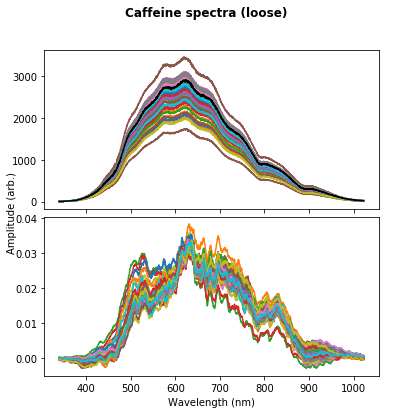

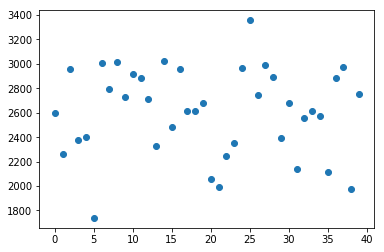

In [27]:
# plot raws
caffeine_spec = [data_old[0][i][2] for i in range(40)]
spectra_plotter(caffeine_spec,'Caffeine spectra (loose)')
plt.show()

# variation between frames, at 596nm
plt.scatter(range(40),np.array(caffeine_spec)[:,700])
plt.show()

### Spectra (fixed)

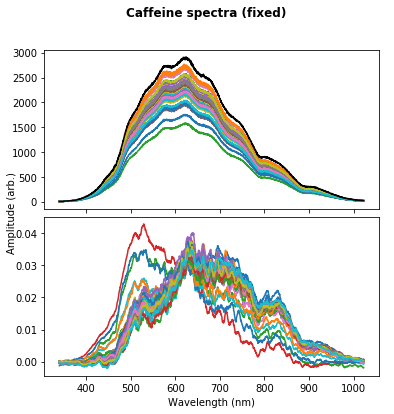

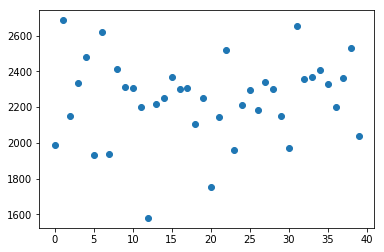

In [28]:
# plot raws
caffeine_spec = [data[0][i][2] for i in range(40)]
spectra_plotter(caffeine_spec,'Caffeine spectra (fixed)')
plt.show()

# variation between frames, at 596nm
plt.scatter(range(40),np.array(caffeine_spec)[:,700])
plt.show()